In [1]:
from packages.display.core import *
%pylab inline
pylab.rcParams['figure.figsize'] = (200, 5)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [60]:
%qtconsole

# Data Cubes

### Band 9, Fixed Width

In [2]:
cube_params = {
  'freq'     : 604000,
  'alpha'    : 0,
  'delta'    : 0,
  'spe_bw'   : 4000,
  'spe_res'  : 1,
  's_f'      : 8,
  's_a'      : 0}

#### Cube 1

### Dictionary Band 9

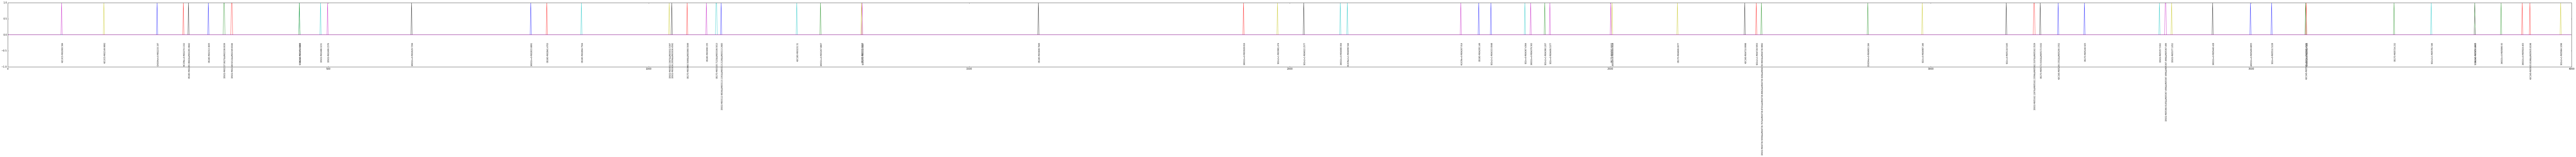

In [3]:
# dictionary = gen_words(molist, cube_params, True)
# save_dictionary(dictionary, 'band_9_dual')

dictionary = load_dictionary('band_9_dual')
plt.ylim(ymin = -1,ymax = 1)
for isotope in dictionary.columns:
    for idx in range(0, len(dictionary[isotope])):
        if (dictionary[isotope].iloc[idx] !=0):
            plt.text(idx, -0.3, isotope, size='8', rotation='vertical')
            break
    plt.plot(dictionary[isotope])
plt.show()

#### Dictionary Recalculated Cube 1 Band 9

In [4]:
cube_name = 'data/cube_fixed_width_'
file_path = cube_name + str(0) + '.fits'

dictionary = load_dictionary('band_9_dual')

train_pixel = (1, 1)
dictionary_recal, detected_peaks = recal_words(file_path, dictionary, cube_params)

X = get_values_filtered_normalized(file_path, train_pixel, cube_params)

y_train = get_fortran_array(np.asmatrix(X))
dictionary_recal_fa = np.asfortranarray(dictionary_recal,
                                        dtype= np.double)

C:\Python\2.7\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


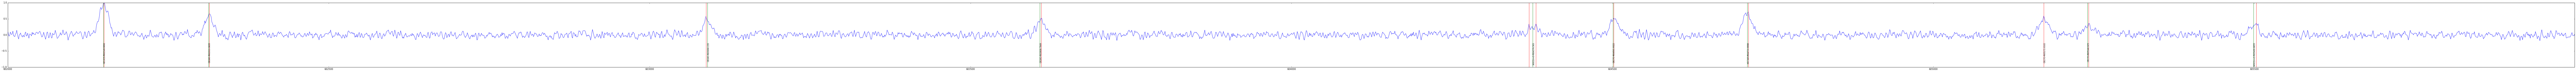

In [5]:
x = get_freq_index_from_params(cube_params)
y = get_values_filtered_normalized(file_path, train_pixel, cube_params)
plt.plot(x, y)
plt.xlim(xmin = x[0], xmax = x[-1])
plt.ylim(ymin = -1,ymax = 1)

lines = get_lines_from_fits(file_path)
for line in lines:
    # Shows lines really present
    isotope_frequency = int(line[1])
    isotope_name = line[0] + "-f" + str(line[1])

    plt.axvline(x=isotope_frequency, ymin=0, ymax= 3, color='g')
    plt.text(isotope_frequency, -0.3, isotope_name, size='8', rotation='vertical')

lambda_param = 0
for idx in range(0, len(detected_peaks)):
    if detected_peaks[idx] != 0:
        plt.axvline(x=x[idx], ymin=0, ymax= 1, color='r', label='Detected peak' if idx == 0 else "")
        lambda_param += 1
plt.legend(loc='upper right')
plt.show()

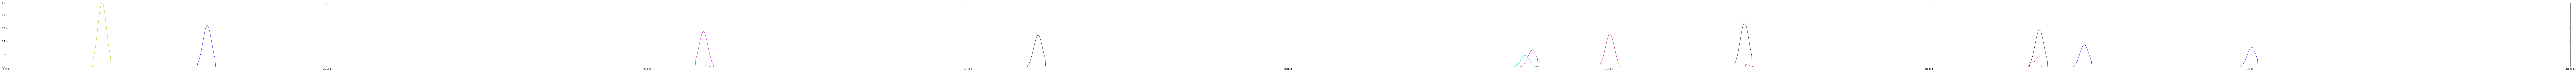

In [6]:
x = get_freq_index_from_params(cube_params)
plt.plot(x, dictionary_recal_fa)
plt.show()

In [7]:
param = {
  'lambda1' : lambda_param,
  # 'L': 1,
  'pos' : True,
  'mode' : 0,
  'ols' : True,
  'numThreads' : -1}

alpha = spams.lasso(y_train, dictionary_recal_fa, **param).toarray()
total = np.inner(dictionary_recal_fa, alpha.T)

C:\Python\2.7\lib\site-packages\spams.py:424: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if D == None:


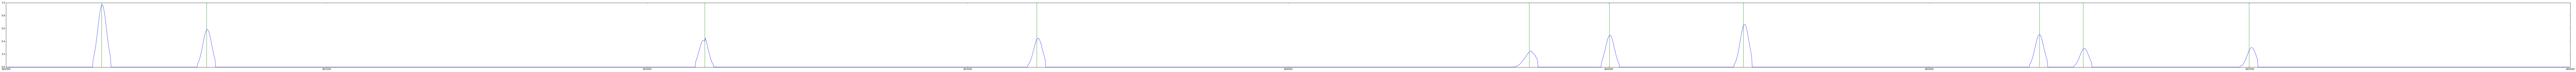

In [8]:
lines = get_lines_from_fits(file_path)
for line in lines:
    # Shows lines really present
    isotope_frequency = int(line[1])
    isotope_name = line[0] + "-f" + str(line[1])

    plt.axvline(x=isotope_frequency, ymin=0, ymax= 3, color='g')
    # plt.text(isotope_frequency, -0.3, isotope_name, size='8', rotation='vertical')

x = get_freq_index_from_params(cube_params)
plt.plot(x, total)
    
plt.show()

In [19]:
confusion_matrix = get_confusion_matrix(dictionary_recal, alpha,
                                           file_path, cube_params, True)

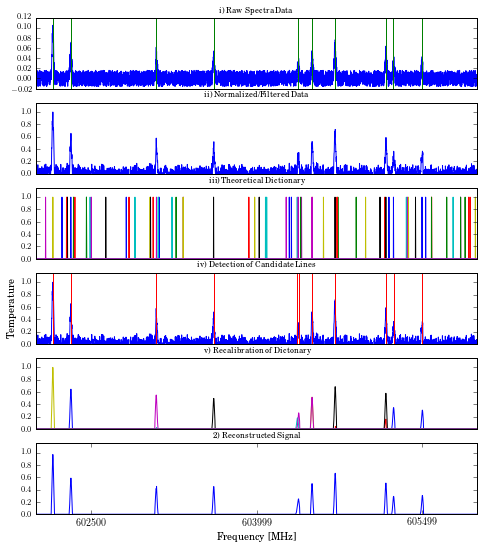

In [29]:
latexify(fig_width=7.9, fig_height=8.9)
file_path = cube_name + str(0) + '.fits'
train_pixel = (1, 1)
x = get_freq_index_from_params(cube_params)

# Step 1: Read Cube
ax = plt.subplot(6, 1, 1)
ax.set_title('i) Raw Spectra Data')
data = get_data_from_fits(file_path)  
y = data[:, train_pixel[0], train_pixel[1]]
plt.xticks([])
plt.plot(x, y)
lines = get_lines_from_fits(file_path)
for line in lines:
    # Shows lines really present
    isotope_frequency = int(line[1])
    isotope_name = line[0] + "-f" + str(line[1])
    plt.axvline(x=isotope_frequency, ymin=0, ymax= 3, color='g')

# 2. Normalize, filter dada
ax = plt.subplot(6, 1, 2)
ax.set_title('ii) Normalized/Filtered Data')
plt.ylim(ymin =0,ymax = 1.15)
y = get_values_filtered_normalized(file_path, train_pixel, cube_params)
plt.xticks([])
plt.plot(x, y)

# 3. Possible Words
ax = plt.subplot(6, 1, 3)
ax.set_title('iii) Theoretical Dictionary')
plt.ylim(ymin =0,ymax = 1.15)
plt.xticks([])
plt.plot(x, dictionary)

# 4. Detect Lines
ax = plt.subplot(6, 1, 4)
ax.set_title('iv) Detection of Candidate Lines')
plt.ylim(ymin =0,ymax = 1.15)
plt.plot(x, y)
plt.xticks([])
plt.ylabel("Temperature")
for idx in range(0, len(detected_peaks)):
    if detected_peaks[idx] != 0:
        plt.axvline(x=x[idx], ymin=0, ymax= 1, color='r')

# 6. Recalibrate Dictionary
ax = plt.subplot(6, 1, 5)
ax.set_title('v) Recalibration of Dictonary')
plt.ylim(ymin =0,ymax = 1.15)
plt.plot(x, dictionary_recal_fa)
plt.xticks([])

# 6. Recover Signal
ax = plt.subplot(6, 1, 6)
ax.set_title('2) Reconstructed Signal')
plt.ylim(ymin =0,ymax = 1.15)

plt.plot(x, total)


plt.xticks([(x[0] + 500), (x[0]+x[-1])/2 ,(x[-1] - 500)])

plt.xlabel("Frequency [MHz]")
plt.savefig("images/process.pdf")

In [20]:
confusion_matrix

,OS18O-f602313.3835,OS18O-f603090.155,OS18O-f603608.7849,H213CS-f602149.9892,34SO2v=0-f604376.563,34SO2v=0-f605499.8855,OS17O-f604501.9322,OS17O-f605172.0102,OS17O-f605240.925,H2C34S-f604710.9998
SO2v=0-f604367.4364,0,0,0,0,0.382845,0,0,0,0,0
34SO2v=0-f604376.563,0,0,0,0,0.617155,0,0,0,0,0
34SO2v=0-f604504.0028,0,0,0,0,0.000000,0,1,0,0,0
34SO2v=0-f605499.8855,0,0,0,0,0.000000,1,0,0,0,0
OS18O-f602313.3835,1,0,0,0,0.000000,0,0,0,0,0
OS18O-f603090.155,0,1,0,0,0.000000,0,0,0,0,0
OS18O-f603608.7849,0,0,1,0,0.000000,0,0,0,0,0
OS17O-f603105.7123&&f603106.5013,0,0,0,0,0.000000,0,0,0,0,0
OS17O-f605172.0102&&f605172.0102,0,0,0,0,0.000000,0,0,1,0,0
OS17O-f605240.925,0,0,0,0,0.000000,0,0,0,1,0


<matplotlib.colorbar.Colorbar instance at 0x0000000018F43588>

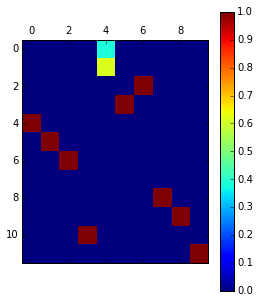

In [22]:
plt.matshow(confusion_matrix)
plt.colorbar()

In [23]:
results = get_results(confusion_matrix)

In [24]:
results

,Precision,Recall,F-Score
OS18O-f602313.3835,1.000000,1,1.00000
OS18O-f603090.155,1.000000,1,1.00000
OS18O-f603608.7849,1.000000,1,1.00000
H213CS-f602149.9892,1.000000,1,1.00000
34SO2v=0-f604376.563,0.617155,1,0.76326
34SO2v=0-f605499.8855,1.000000,1,1.00000
OS17O-f604501.9322,0.000000,1,0.00000
OS17O-f605172.0102,1.000000,1,1.00000
OS17O-f605240.925,1.000000,1,1.00000
H2C34S-f604710.9998,1.000000,1,1.00000


In [25]:
np.mean(results["F-Score"])

0.87632600245516667

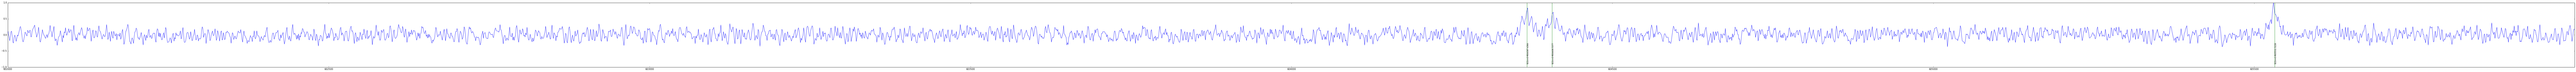

In [12]:
cube_name = 'data/cube_fixed_width_'

x = get_freq_index_from_params(cube_params)

for i in range(1, 2):
    file_path = cube_name + str(i) + '.fits'
    train_pixel = (1, 1)
    y = get_values_filtered_normalized(file_path, train_pixel, cube_params)
    plt.plot(x, y)
    plt.legend(loc='upper right')
    plt.xlim(xmin = x[0], xmax = x[-1])
    plt.ylim(ymin = -1,ymax = 1)
    
    lines = get_lines_from_fits(file_path)
    for line in lines:
        # Shows lines really present
        isotope_frequency = int(line[1])
        isotope_name = line[0] + "-f" + str(line[1])

        plt.axvline(x=isotope_frequency, ymin=0, ymax= 3, color='g')
        plt.text(isotope_frequency, -0.3, isotope_name, size='8', rotation='vertical')
    
    plt.show()

In [30]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 4.89 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 24.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 10, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'text.fontsize': 10, # was 10
              'legend.fontsize': 10, # was 10
              'xtick.labelsize': 10,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax


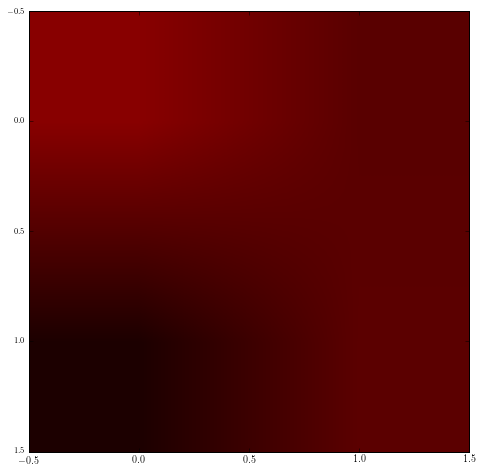

In [62]:
import matplotlib.animation as animation

def _updatefig(j):
    """ Animate helper function """
    im.set_array(data[j, :, :])
    return im

cube_name = 'data/cube_fixed_width_24.fits'
data = get_data_from_fits(cube_name)  
fig = plt.figure()
im = plt.imshow(data[0, :, :], cmap=plt.get_cmap('hot'), vmin=data.min(), vmax=data.max())
ani = animation.FuncAnimation(fig, _updatefig
                              , frames=range(4000), interval=2, blit=True, repeat=10)